# NLP project


Project 21: Automatic Summarization  

We shall consider structured document containing a title, abstract and a set of subsections. We would like to build a text summarizer such that tracks important keywords in the document. For this purpose, the first step is identify these keywords.  

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip list
# tarkista löytyykö: lxml, html5lib, requests, selenium, webdriver-manager
# lisäohjeita task1

Package                            Version
---------------------------------- -------------------
absl-py                            0.9.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argh                               0.26.2
asn1crypto                         1.3.0
astroid                            2.3.3
astropy                            4.0
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.3.0
attrs                              19.3.0
autopep8                           1.4.4
Babel                              2.8.0
backcall                           0.1.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
bcrypt                             3.1.7
beautifulsoup4                     4.8

In [3]:
#jos nltk ei löydy asenna -> ! pip install nltk
import nltk
nltk.download("stopwords")
#from nltk.cluster.util import cosine_distance

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Markus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## TASK 1
Assume the initial input is given as html document (choose an example of your own), we hypothesize that important keywords are initially contained in the words of titles, abstract and possibly titles of subsections of the document. Suggest a simple python script that inputs an html document and outputs the lists of words in the title, abstract and title of section/subsections.

In [38]:
from bs4 import BeautifulSoup
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
# Kaikki sivut ei anna koko html bodyä käyttämällä pelkkää requestia. Seleniumilla näyttää toimivan useammilla. 
# pip install -U selenium
# pip install webdriver-manager
# jos käytät anacondaa eikä meinaa toimia niin kokeile myös $ conda update pip

#Collect title, subtitles and abstract from html file

url = "https://ieeexplore.ieee.org/document/6809191"
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get(url)

soup = BeautifulSoup(driver.page_source, 'lxml')
#print(soup.prettify())

# Headline
headline = soup.find("h1", {"class": "document-title"}).text
print("Headline: {}\n".format(headline))

# Abstact
abstract = soup.find("div", {"class": "abstract-text"}).text
print("{}\n\n".format(abstract))

# Titles of sections
article = soup.find("div", {"id": "article"})
sectionTitles = article.find_all("h3")
print("Section titles:")
for title in sectionTitles:
    print("{}".format(title.text))

# Titles of subsections
subsectionTitles = article.find_all("h4")
print("\nSubsection titles:")
for title in subsectionTitles:
    print("{}".format(title.text))

#driver.close()

[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 94.0.4606
[WDM] - Get LATEST driver version for 94.0.4606
[WDM] - Driver [C:\Users\Markus\.wdm\drivers\chromedriver\win32\94.0.4606.61\chromedriver.exe] found in cache
C:\Users\Markus\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  if sys.path[0] == '':


Headline: Scalable Nearest Neighbor Algorithms for High Dimensional Data

 Abstract:For many computer vision and machine learning problems, large training sets are key for good performance. However, the most computationally expensive part of many computer vision and machine learning algorithms consists of finding nearest neighbor matches to high dimensional vectors that represent the training data. We propose new algorithms for approximate nearest neighbor matching and evaluate and compare them with previous algorithms. For matching high dimensional features, we find two algorithms to be the most efficient: the randomized k-d forest and a new algorithm proposed in this paper, the priority search k-means tree. We also propose a new algorithm for matching binary features by searching multiple hierarchical clustering trees and show it outperforms methods typically used in the literature. We show that the optimal nearest neighbor algorithm and its parameters depend on the data set characte

In [6]:
import yake

In [7]:
#Keyword search and analysis

w_extractor = yake.KeywordExtractor()

language = "fi"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 50 #alunperin 10

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(text)

for kw in keywords:
    print(kw)


('Suomea viikoilla', 0.023458380875189744)
('sää Koulujen', 0.04498862876540802)
('Koulujen syyslomia', 0.04498862876540802)
('puolilla Suomea', 0.04498862876540802)
('tältä näyttää', 0.04940384002065631)
('viilenee kovaa', 0.04940384002065631)
('Saattaa', 0.08596317751626563)
('Lapissa', 0.08596317751626563)
('näyttää syyslomaviikkojen', 0.09700399286574239)
('syyslomaviikkojen sää', 0.09700399286574239)
('syyslomia vietetään', 0.09700399286574239)
('kovaa vauhtia.Tilastojen', 0.09700399286574239)
('kuun loppupuolella', 0.09700399286574239)
('ehjä väliaikainen', 0.09700399286574239)
('väliaikainen lumipeite', 0.09700399286574239)
('Koulujen', 0.1447773057422032)
('Suomea', 0.1447773057422032)
('hiutaleita', 0.15831692877998726)
('tältä', 0.15831692877998726)
('viikoilla', 0.15831692877998726)
('viilenee', 0.15831692877998726)
('näyttää', 0.29736558256021506)
('syyslomaviikkojen', 0.29736558256021506)
('sää', 0.29736558256021506)
('syyslomia', 0.29736558256021506)
('vietetään', 0.29736

## TASK 2
Write down a simple python script that allows you to output the histogram of word frequency in the document, excluding the stopwords (see examples in online NLTK book). Use SpaCy named-entity tagger to identify person-named entities and organization-named entities in the document.

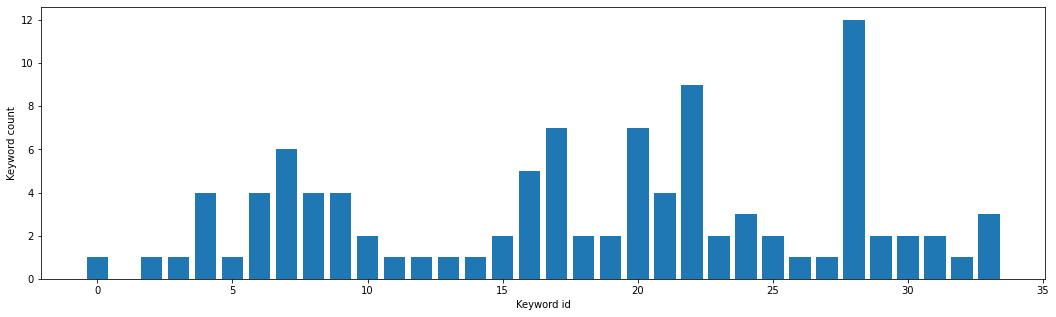

In [15]:
#from collections import Counter
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

#Calculate the word frequencies and plot the histogram

#Purkkapallolla koko artikkeli -> string
article_readable = headline

article_readable += (article.find('div', class_="article-content").h1.text) + " "

subheadlines = article.find_all("h3", {'class':'subheadline'})
for subheadline in subheadlines:
    article_readable += subheadline.text

article_readable += article_readable + " "
    
summary = article.find_all("div", {'class':'article-bullets'})
for bullet in summary:
    article_readable += "{}\n".format(bullet.text)
    
text = article.find_all('p', {'class':'paragraph'})
for line in text:
    article_readable += line.text
    
#print(article_readable)
#Purkkapallo suoritettu

stopwords = stopwords.words("finnish")
#print(stopwords)

#Remove stopwords from the keywords list
keywords_only, keywords_nums = zip(*keywords) 
keywords_no_sw =  [word for word in keywords_only if not word in stopwords]
keywords_counts = []

for kw in keywords_no_sw:
    kw_count = article_readable.count(kw)
    keywords_counts.append(kw_count)

#print(keywords_no_sw)
#print(keywords_counts)
    
#Plotting the histogram
fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(keywords_no_sw)), keywords_counts, align='center')
plt.ylabel('Keyword count')
plt.xlabel('Keyword id')
plt.show()

In [10]:
#Use SpaCy to identify person-named entities and organization-named entities
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

#vinkkiä https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

#Identifying person and organization-named entities
nlp = en_core_web_sm.load()
doc = nlp(article_readable)

for X in doc.ents:
    print("{} - {}".format(X.text, X.label_))


Koulujen - GPE
41 - CARDINAL
42 - DATE
43.Sää - CARDINAL
kuun loppupuolella voidaan saada jo - PERSON
Lapissa - PERSON
Koulujen - GPE
viikon ajan - PERSON
Suomea - ORG
minkä jälkeen muualla - PERSON
42 - CARDINAL
jokaiselle - GPE
kolmelle viikolle - PERSON
hieman sateita - PERSON
kehittymistä ja ennusteita - ORG
Koko - PERSON
melko pilvinen ja sateinen - PERSON
kertoo Forecan - PERSON
Joanna Rinne - PERSON
viikon aikana - PERSON
Lapissa - PERSON
jo lähelle viittä - ORG
kun - CARDINAL
tällä kuluvalla viikolla - ORG
Yölämpötilat - GPE
jo pakkasen puolella - PERSON
Rinne kertoo - PERSON
Hajanaisia - GPE
viikon ajan - PERSON
Rinne - PERSON
viikon kohdalla ennusteissa siirrytään - PERSON
Rinne - PERSON
Viikolla 42 - ORG
vietetään eri puolilla maata - ORG
esimerkiksi pääkaupunkiseudulla - GPE
Rovaniemellä - PERSON
lähellä keskiarvoa - ORG
kuin keskimääräisesti - PERSON
Rinne - PERSON
Hyvin - PERSON
Lokakuussa Suomen sää - PERSON
lähellä - ORG
ehkä pikkaisen - ORG
sateisempaa kuin vuodenaikaa

## TASK 3

We would like the summarizer to contain frequent wording (excluding stopwords) and as many named-entities as possible. For this purpose, use the following heuristic to construct the summarizer. First we shall assume each sentence of the document as individual sub-document. Use TfIdf vectorizer to output the individual tfidef score of each word of each sentence (after initial preprocessing and wordnet lemmatization stage). Then consider only sentences that contain person or organization named-entities and use similar approach to output the tfidf score of the named-entities in each sentence. Finally construct the sentence (S) weight as a  weighted sum:
<br>
$$S_{weight}=\sum_{w\varepsilon S}W_{TfiDf}+2\sum_{NM\varepsilon S}NM_{TfiDf}+POS_s$$
<br>
where NMTfiDF stands for the TfIdF of named-entity NM in sentence S.  POSS corresponds to the sentence weight associated to the location of the sentence. So that the sentence location weight will be maximum (1) if located in the title of the document, 0.5 if located  in the title of one of the subsection, 0.25 if located in the title one of the subsubsection, 0.1 if located in one representative object of the document, and 0 if located only in the main text. Make sure to normalize the term tfidf and Nm tfidf weights and suggest a script to implement the preceding accordingly, so that the summarizer will contain the 10 sentences with the highest Sweight scores.  



## TASK 4
Test the above approach with Opinosis dataset available at https://kavita-ganesan.com/opinosis-opinion-dataset/#.YVw6J5ozY2x,  and record the corresponding Rouge-2 and Rouge-3 evaluation score. 

## TASK 5

We would like to improve the summarization by taking into account the diversity among the sentence in the sense that we would like to minimize redundancy among sentences. For this purpose, we shall use the sentence-to-sentence semantic similarity introduced in the NLP lab. Next, instead of recording only the 10 sentences with highest Sweight scores, we shall record the 20 top sentences in terms of $S_{weight}$ scores. Then the selection of the top 10 sentences among the 20 sentences follows the following approach. First, order the 20 sentences in the decreasing order of their $S_{weight}$ scores, say S1, S2, …, S20 (where S1 is the top ranked and S20 the 20th ranked sentence). Second, we shall assume that S1 is always included in the summarizer, we shall then attempt to find the other sentences among S2 till S20 to be included into the summarizer. Calculate the sentence-to-sentence similarity Sim(S1,Si) for i=1 to 20, the Sentence Sj that yields the minimum similarity with S1 will therefore be included in the summarizer. Next, for each of the remaining sentences Sk (with k different from 1 and j), we calculate the sentence similarity with Sj. Therefore the sentence Sp that yields minimum value of “Sim(Sp, S1)+Sim(Sp,Sj)” will be included in the summarizer (Note: the quantity Sim(Sp, S1) is already calculated in previous step).  Similarly in the next phase, we should select a sentence Sl (l different from 1, j and k) so that  “Sim(Sl, S1)+Sim(Sl,Sj)+Sim(Sl,Sp)”, Etc.. You then stop once you reached 10 sentences included in the summarizer. Suggest a script that includes this process.. and illustrate its functioning in the example you chosen in 1).

## TASK 6

We would like to make the choice of keywords not based on histogram frequency but using the open source RAKE https://www.airpair.com/nlp/keyword-extraction-tutorial. Repeat the previous process of selecting the sentences that are associated to the ten first keywords generated by RAKE. Comment on the quality of this summarizer based on your observation

## TASK 7

It is also suggested to explore alternative implementations with larger number of summarization approaches implemented- https://github.com/miso-belica/sumy. Show how each of the implemented summarizer behaves when inputted with the same document you used in previous case.

## TASK 8

Now we would like to compare the above summarizers and those in 3), 5) and 7) on a new dataset constructed as follows. First select an Elsevier journal of your own and select 10 papers highly ranked in the journal according to citation index (The journal papers should be well structured to contain Abstract, Introduction and Conclusion). For each of the ten papers, consider the introduction as the main document to seek to apply summarizer, and consider the Abstract and Conclusion as two golden summary of the document that you can use for assessment using ROUGE-1 and ROUGE-2 evaluation. Report in a table the evaluation score of each summarizer. 

## TASK 9

Design a simple GUI that allows the user to input a text or a link to a document to be summarized and output the summarizer according to 3), algorithms implemented in 7)